## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as  np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results , on="Mouse ID", how="outer")
# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
# Checking the number of mice.
total_mice = len(merged_data["Mouse ID"].value_counts())
total_mice


249

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data[merged_data.duplicated(['Mouse ID','Timepoint'])]
duplicates



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse = merged_data[merged_data['Mouse ID'] == 'g989']
dupe_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data['Mouse ID'] != 'g989']


In [40]:
# Checking the number of mice in the clean DataFrame.
revised_mice = len(clean_data['Mouse ID'].value_counts())
revised_mice

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_table = clean_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = summary_table['Tumor Volume (mm3)'].mean()
tumor_median = summary_table['Tumor Volume (mm3)'].median()
tumor_var = summary_table['Tumor Volume (mm3)'].var()
tumor_std = summary_table['Tumor Volume (mm3)'].std()
tumor_SEM = summary_table['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

summarized_regimen = pd.DataFrame({'Mean': tumor_mean,
                                  'Median': tumor_median,
                                  'Variance': tumor_var,
                                  'Standard Deviation': tumor_std,
                                  'SEM': tumor_SEM})
summarized_regimen

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, 'Timepoints')

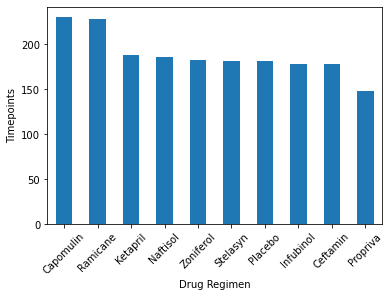

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#xlabel = regimen
#ylabel = regimen.value_counts

labels = (clean_data['Drug Regimen'].value_counts()).index.values

panda_plot = clean_data['Drug Regimen'].value_counts().plot.bar()

panda_plot.set_xticklabels(labels, rotation=45)

panda_plot.axes.set_xlabel("Drug Regimen")
panda_plot.axes.set_ylabel("Timepoints")

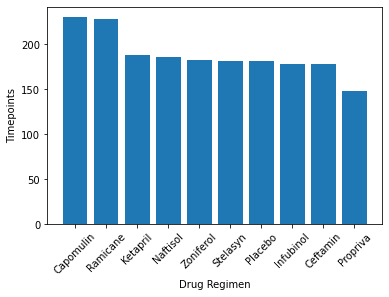

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

y_axis = clean_data['Drug Regimen'].value_counts()
x_axis = np.arange(0, len(y_axis))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values, rotation=45)

plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')

plt.bar(x_axis, y_axis)
plt.show()

Text(0, 0.5, '')

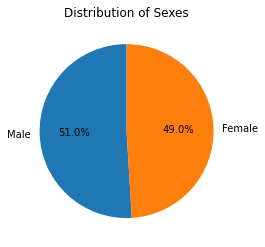

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
m_f_data = clean_data['Sex'].value_counts()

pandas_pie = m_f_data.plot.pie(autopct='%1.1f%%', startangle=90, title='Distribution of Sexes')

#ylabel is in the way
pandas_pie.set_ylabel('')

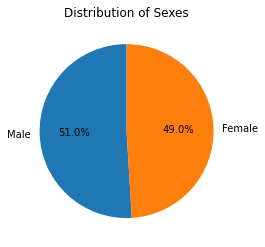

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(m_f_data, labels=m_f_data.index.values, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sexes')
plt.show()


## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse (make a new dataframe)
maxDF = pd.DataFrame(clean_data.groupby('Mouse ID')['Timepoint'].max().sort_values())
maxDF = maxDF.reset_index().rename(columns={'Timepoint':'Max Timepoint'})
maxDF

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_merge = pd.merge(clean_data, maxDF, on='Mouse ID')
max_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [54]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in regimens:
    
    # loc only regimens in list above
    specific_regimens = max_merge.loc[max_merge['Drug Regimen'] == regimen]
    
    # make a new df that contains only the last timepoint for each mouse on each drug. use loc to focus on final timepoint only
    final_tumor_volumes = specific_regimens.loc[max_merge['Timepoint'] == max_merge['Max Timepoint']]
    
    # add the values to the empty list above
    tumor_data_values = final_tumor_volumes['Tumor Volume (mm3)']
    tumor_data.append(tumor_data_values)
  
    # Calculate the IQR and quantitatively determine if there are any potential outliers.  
    quartiles = tumor_data_values.quantile([.25, .50, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = (tumor_data_values.loc[(final_tumor_volumes['Tumor Volume (mm3)'] <= lower_bound) |
                                        (final_tumor_volumes['Tumor Volume (mm3)'] >= upper_bound)]).count()
    #print findings
    print(f'The lower bound for {regimen} is {lower_bound}.')
    print(f'The upper bound for {regimen} is {upper_bound}.')
    print(f'Number of outliers for {regimen} is: {outliers}')
    

The lower bound for Capomulin is 20.70456164999999.
The upper bound for Capomulin is 51.83201549.
Number of outliers for Capomulin is: 0
The lower bound for Ramicane is 17.912664470000003.
The upper bound for Ramicane is 54.30681135.
Number of outliers for Ramicane is: 0
The lower bound for Infubinol is 36.83290494999999.
The upper bound for Infubinol is 82.74144559000001.
Number of outliers for Infubinol is: 1
The lower bound for Ceftamin is 25.355449580000002.
The upper bound for Ceftamin is 87.66645829999999.
Number of outliers for Ceftamin is: 0


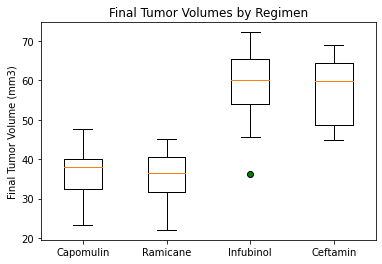

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes by Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
# mark outlier with different shape/color
green_outlier = dict(markerfacecolor='g', marker='o')
ax1.boxplot(tumor_data, flierprops=green_outlier)
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

In [58]:
# find mouse
Capomulin = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
Capomulin.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


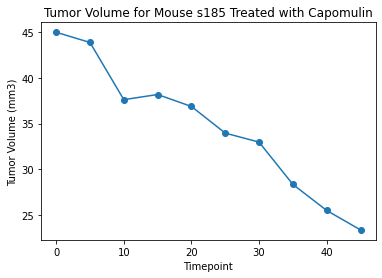

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
c_mouse = clean_data.loc[clean_data['Mouse ID'] == 's185']
plt.plot(c_mouse['Timepoint'], c_mouse['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume for Mouse s185 Treated with Capomulin')
plt.show()

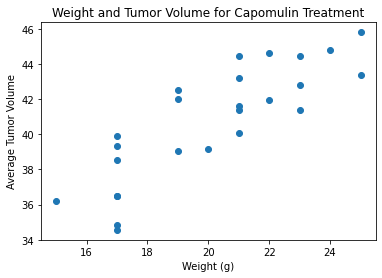

In [67]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# make another df for avg tumor volume
avg_vol = pd.DataFrame(Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())
avg_vol = avg_vol.reset_index().rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume'})

# make another df for weight and merge the two
weight_vol = pd.merge(Capomulin, avg_vol, on='Mouse ID')

# group two relevant columns and get rid of duplicates
weight_vol = weight_vol[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()

# create axes
xaxis = weight_vol['Weight (g)']
yaxis = weight_vol['Average Tumor Volume']

# make a scatter plot
plt.scatter(xaxis, yaxis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Weight and Tumor Volume for Capomulin Treatment')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
